In [2]:
from parselmouth import praat
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json

sns.set()
plt.rcParams['figure.dpi'] = 100

In [3]:
def draw_pitch(pitch):
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def getFormant(sound):
    f0min=75
    f0max=300
    pointProcess = praat.call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    formants = praat.call(sound, "To Formant (burg)", 0.0025, 5, 5000, 0.025, 50)
    numPoints = praat.call(pointProcess, "Get number of points")
    f1_list = []
    f2_list = []
    f3_list = []
    for point in range(0, numPoints):
        point += 1
        t = praat.call(pointProcess, "Get time from index", point)
        f1 = praat.call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = praat.call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f3 = praat.call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2)
        f3_list.append(f3)
    print("F1 List", f1_list)
    print("F2 List", f2_list)
    print("F3 List", f3_list)
    return {
        "F1 List" : f1_list,
        "F2 List" : f2_list,
        "F3 List" : f3_list
    }
    

F1 List [nan, nan, 276.31831560362065, 279.216897940112, 278.42094702180333, 278.75844436169024, 274.74705454834185, 276.8394120050266, 299.4816696704622, 288.4235999654956, 303.80282108212083]
F2 List [nan, nan, 2019.0127456810415, 1995.092960243746, 2006.5327774776697, 1986.6797193717885, 1981.233197612929, 1990.1153962881556, 2020.9742469704493, 2002.21997024988, 2055.554651170501]
F3 List [nan, nan, 2405.279365660661, 2753.9788530186934, 2789.7894210815407, 2718.6350763391106, 2715.226587683328, 2752.269198255272, 2767.913202680065, 2769.2896355015673, 2819.7651004662202]
F1 List [557.9620451138596, 563.9459029239654, 554.8982169643008, 479.49842631857655, 498.20337464317157, 719.2045371237991, 319.874341997448, 320.6160660538543, 316.17518629889685, 312.4803552057549, 306.8703896508545, 300.7482168189614, nan]
F2 List [1321.3984544119373, 1379.1901408833141, 1387.4116283316046, 1377.8260947859976, 1530.152936689407, 1526.0140987700015, 1858.9830731492202, 1922.1696683674238, 1971.

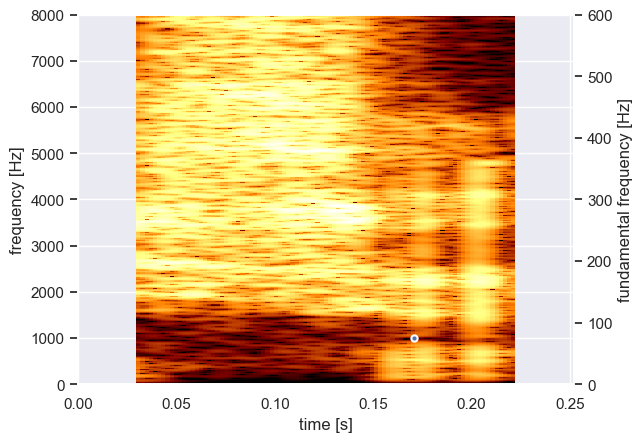

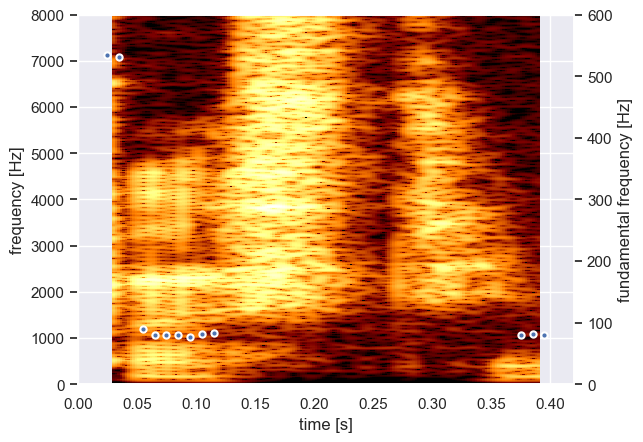

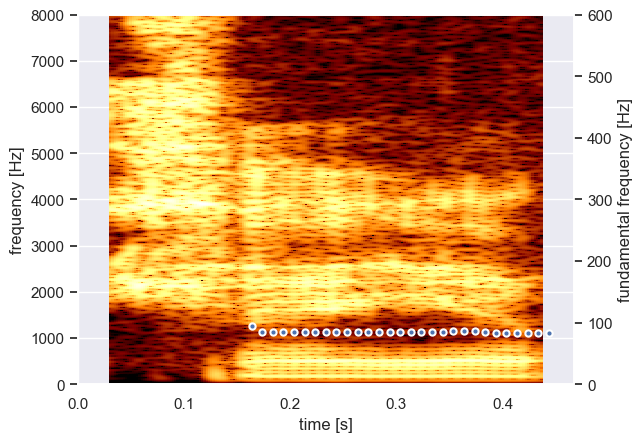

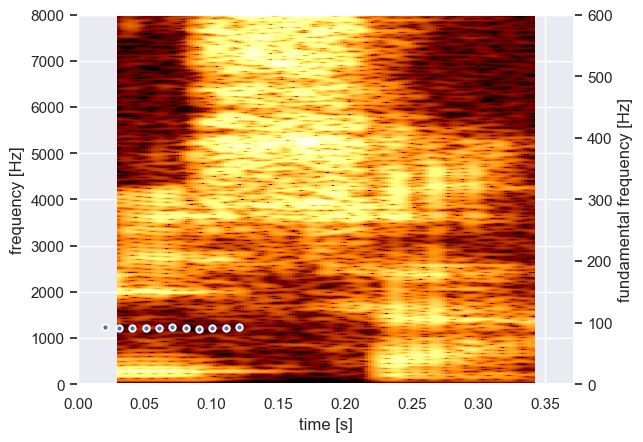

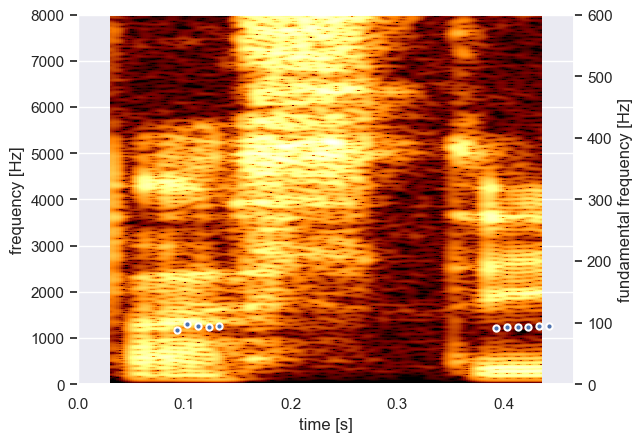

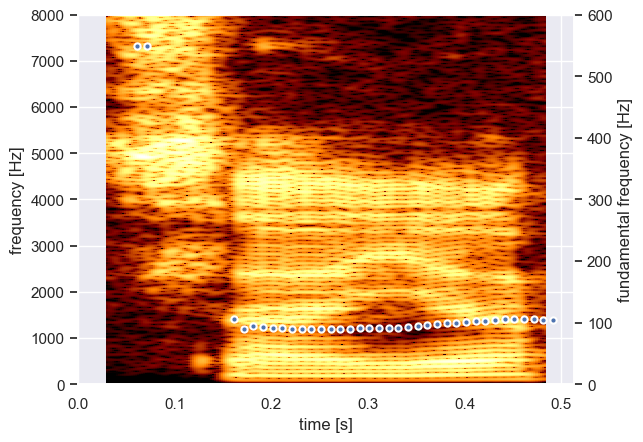

In [4]:
fake_path = 'fake-sound/splitted'
fake_files = glob.glob(fake_path + '/*.wav')

real_path = 'sound/splitted'
real_files = glob.glob(real_path + '/*.wav')

for soundpath in fake_files :
    snd = parselmouth.Sound(soundpath)
    pitch = snd.to_pitch()
    pre_emphasized_snd = snd.copy()
    pre_emphasized_snd.pre_emphasize()
    spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
    plt.figure()
    draw_spectrogram(spectrogram)
    plt.twinx()
    draw_pitch(pitch)
    plt.xlim([snd.xmin, snd.xmax])
    plt.savefig(soundpath + ".png")

for soundpath in real_files :
    snd = parselmouth.Sound(soundpath)
    pitch = snd.to_pitch()
    pre_emphasized_snd = snd.copy()
    pre_emphasized_snd.pre_emphasize()
    spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
    plt.figure()
    draw_spectrogram(spectrogram)
    plt.twinx()
    draw_pitch(pitch)
    plt.xlim([snd.xmin, snd.xmax])
    plt.savefig(soundpath + ".png")

for soundpath in real_files : 
    snd = parselmouth.Sound(soundpath)
    file1 = open(soundpath + ".txt","w")
    formant = getFormant(snd)
    json_object = json.dumps(formant, indent = 4) 
    file1.write(json_object)
    file1.close()

for soundpath in fake_files : 
    snd = parselmouth.Sound(soundpath)
    file1 = open(soundpath + ".txt","w")
    formant = getFormant(snd)
    json_object = json.dumps(formant, indent = 4) 
    file1.write(json_object)
    file1.close()